[*********************100%%**********************]  1 of 1 completed

C:\Users\Mahardika\AppData\Local\Temp\ipykernel_15864\4231939536.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = stock_data['Adj Close'][-1]


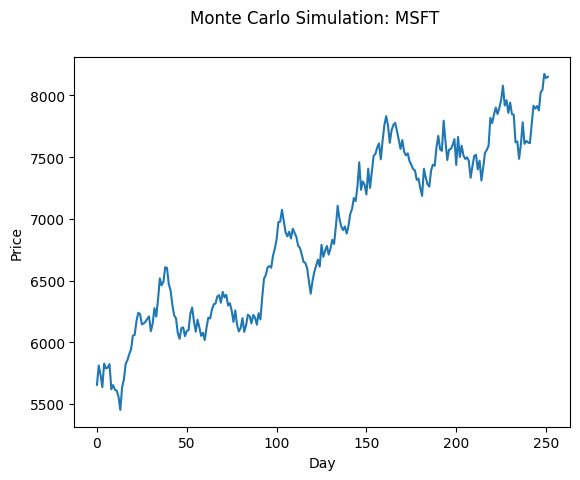

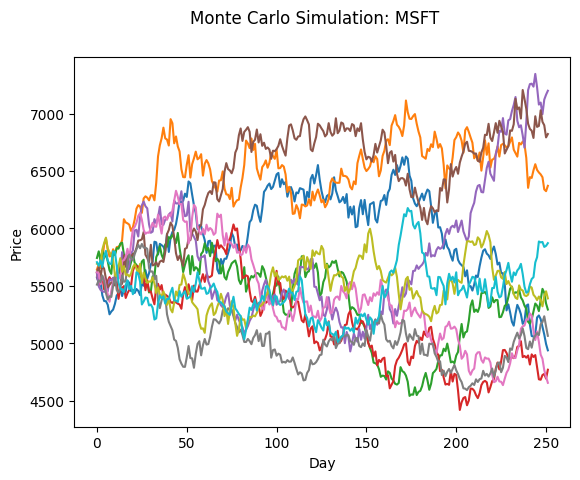

Expected price:  5638.37
Quantile (5%):  4708.129694260308
Quantile (95%):  7029.07547070171


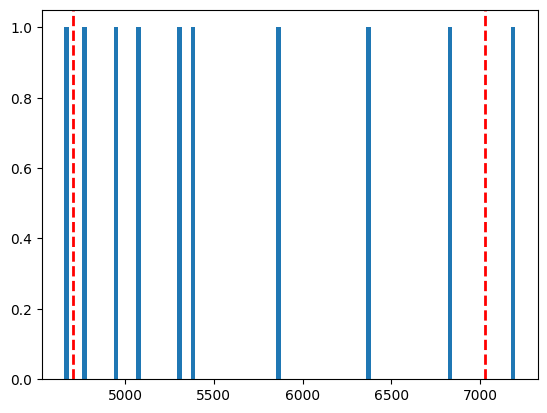

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 18 22:55:16 2021

@author: Teo Bee Guan
"""

import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

start = dt.datetime(2022, 12, 29)
end = dt.datetime(2023, 12, 31)

stock_data = yf.download('BBRI.JK', start, end)

returns = stock_data['Adj Close'].pct_change()
daily_vol = returns.std()

T = 252
count = 0
price_list = []
last_price = stock_data['Adj Close'][-1]

price = last_price * (1 + np.random.normal(0, daily_vol))
price_list.append(price)

for y in range(T):
    if count == 251:
        break
    price = price_list[count]* (1 + np.random.normal(0, daily_vol))
    price_list.append(price)
    count += 1

fig = plt.figure()
fig.suptitle("Monte Carlo Simulation: MSFT")
plt.plot(price_list)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

NUM_SIMULATIONS =  10
df = pd.DataFrame()
last_price_list = []
for x in range(NUM_SIMULATIONS):
    count = 0
    price_list = []
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_list.append(price)
    
    for y in range(T):
        if count == 251:
            break
        price = price_list[count]* (1 + np.random.normal(0, daily_vol))
        price_list.append(price)
        count += 1
        
    df[x] = price_list
    last_price_list.append(price_list[-1])
        
fig = plt.figure()
fig.suptitle("Monte Carlo Simulation: MSFT")
plt.plot(df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

print("Expected price: ", round(np.mean(last_price_list),2))
print("Quantile (5%): ",np.percentile(last_price_list,5))
print("Quantile (95%): ",np.percentile(last_price_list,95))

plt.hist(last_price_list,bins=100)
plt.axvline(np.percentile(last_price_list,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(last_price_list,95), color='r', linestyle='dashed', linewidth=2)
plt.show()


